# Exploratory Data Analysis

# Introduction

Zomato is one of the most-used apps to find food and restaurants in and around one locality to order and check reviews. Zomato has not only solved the problem of ordering food sitting at your home but also has provided a single platform to know more details about each restaurant.

Column Description:


* ```Name``` : Denotes the name of the restaurant.
* ```URL```  : Denotes the URL of the restaurant.
* ```Cuisines``` : Contains list of cuisines provided by the restaurant.
* ```Area```  : Denotes the present area of the restaurant.
* ```Timing```  : Provides information about the opening/closing hours.
* ```Full_Address``` : Provides information about the exact location of the restaurant.
* ```PhoneNumber```  : Contact information of the restaurant.
* ```IsHomeDelivery``` :'1' denotes home deliveries are available.'0' denotes home deliveries are not available.
* ```isTakeaway``` :'1' denotes takeaways are available.'0' denotes takeaways are not available.
* ```isIndoorSeating``` :'1' denotes indoor seatings are available.'0' denotes indoor seatings are not available.
* ```isVegOnly```  :'1' denotes that its a restaurant that provides only vegetarian food. '0' denotes that its a restaurant that does not provide only vegetarian food.
* ```Dinner Ratings``` : Dinner Ratings of the restaurant on the scale of 5.
* ```Dinner Reviews``` : Number of reviews provided by the customers based on dinner.
* ```Delivery Ratings``` : Delivery Ratings of the restaurant on the scale of 5.
* ```Delivery Reviews``` : Number of reviews provided by the customers based on deliveries.
* ```KnownFor```  : Delicacies for which the restaurants are famous for.
* ```PopularDishes``` : High-rated dishes of the restaurants.
* ```PeopleKnownFor``` : Reviews for the restaurant.
* ```AverageCost``` : Average expenditure on each restaurant.



By performing EDA on this dataset we will try to gain insights from the data.

# Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/zomato_clean_Data.csv')

# DATA VISUALISATION

### 2. Pie-Chart representation of common cuisines available in most restaurants.

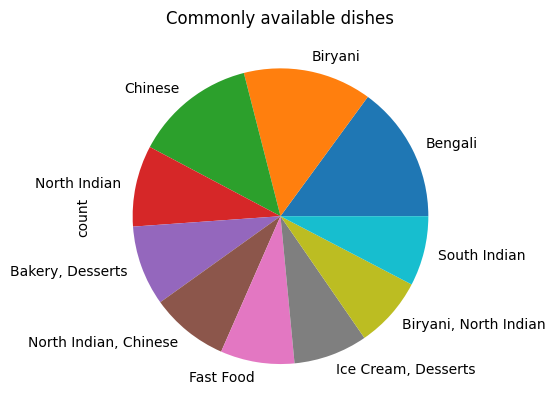

In [ ]:
df['Cuisines'].value_counts().head(10).plot(kind='pie')
plt.title('Commonly available dishes')
plt.show()

**From the above graph we can see ten cuisines available in most restaurants.**

### 3. Pie-Chart representaion of restaurants providing indoor seating.

In [ ]:
#Total number of restaurants providing / not providing indoor seatings.
df['isIndoorSeating'].value_counts().to_frame()

,count
isIndoorSeating,
0,2964
1,1959


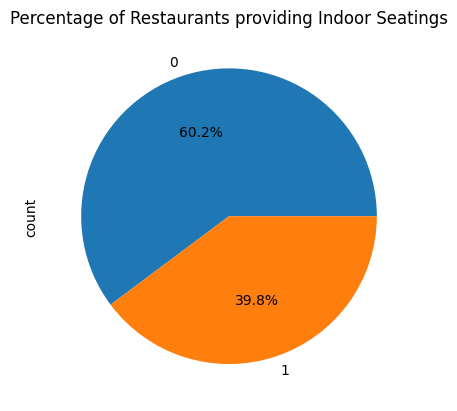

In [ ]:
df['isIndoorSeating'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title("Percentage of Restaurants providing Indoor Seatings")
plt.show()

**Around 60% restaurants provided indoor seatings whereas 40% did not provide indoor seatings. From this graph we can conclude that most of the restaurants provides indoor seatings.**

### 4. Pie Chart to show how many percentage of restaurants provide home delivery.

In [ ]:
#Total number of restaurants providing/ not providing home delivery
df['IsHomeDelivery'].value_counts().to_frame()

,count
IsHomeDelivery,
1,4918
0,5


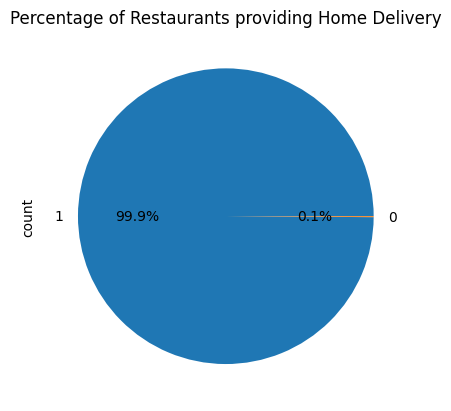

In [ ]:
df['IsHomeDelivery'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title("Percentage of Restaurants providing Home Delivery")
plt.show()

**From the above graph we can conclude that 99.9% restaurants provide home delivery services.**

### 5. Pie-Chart representation of the percentage of restaurants providing Takeaways

In [ ]:
#Total number of restaurants providing or not providing home delivery
df['isTakeaway'].value_counts().to_frame()

,count
isTakeaway,
1,3375
0,1548


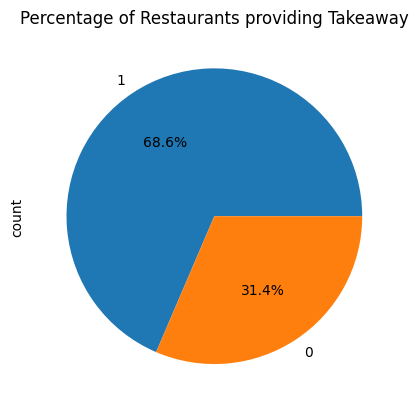

In [ ]:
df['isTakeaway'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title("Percentage of Restaurants providing Takeaway")
plt.show()

**From the above graph we can conclude that 68.6% restaurants had takeaway facilities whereas 31.4% restaurants did not have takeaway facilities.**

### 6. Pie-Chart representation of the percentage of restaurants providing Only Vegetarian option.

In [ ]:
#Total number of restaurants providing / not providing only vegetarian food.
df['isVegOnly'].value_counts().to_frame()

,count
isVegOnly,
0,4583
1,340


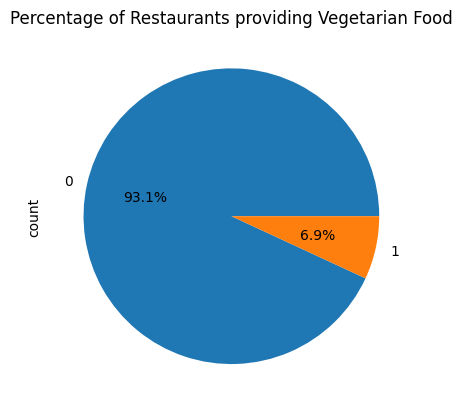

In [ ]:
df['isVegOnly'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title("Percentage of Restaurants providing Vegetarian Food")
plt.show()

**Around 93% restaurants didn't have veg only options.**

### 7. Box Plot to analyse the relation between Average Cost and Home Delivery

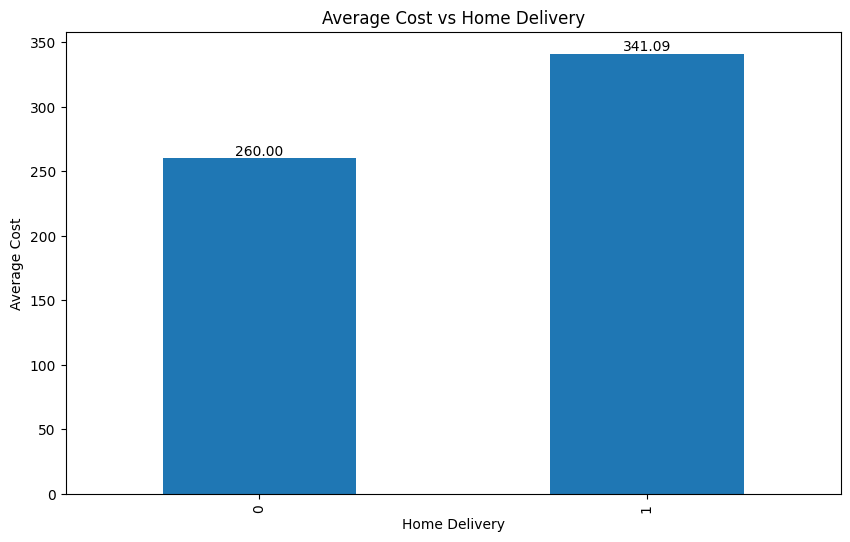

In [ ]:
# Create a bar plot with average cost values on top of the bars
plt.figure(figsize=(10, 6))
ax = df.groupby('IsHomeDelivery')['AverageCost'].mean().plot(kind='bar')
for i, v in enumerate(df.groupby('IsHomeDelivery')['AverageCost'].mean()):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.title('Average Cost vs Home Delivery')
plt.xlabel('Home Delivery')
plt.ylabel('Average Cost')
plt.show()

**From the above graph we can conclude that average cost is higher for restaurants providing home deliveries than those not providing home deliveries.**

### 8. Dinner Ratings VS Average Cost

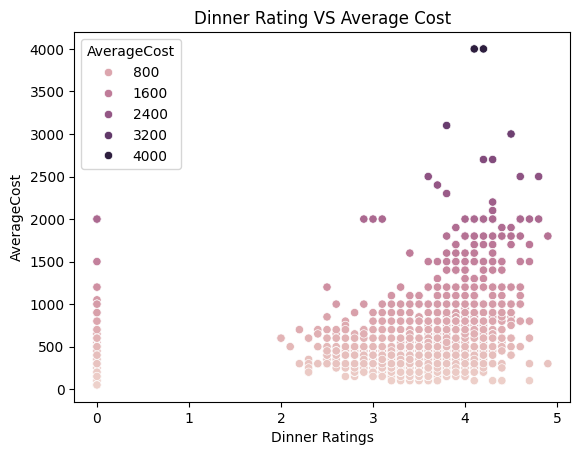

In [ ]:
sns.scatterplot(data=df, x='Dinner Ratings', y='AverageCost', hue='AverageCost')
plt.title("Dinner Rating VS Average Cost")
plt.show()

**From the above graph we conclude that higher the average cost better is the dinner rating in many cases.**

### 9. Delivery Ratings VS Average Cost

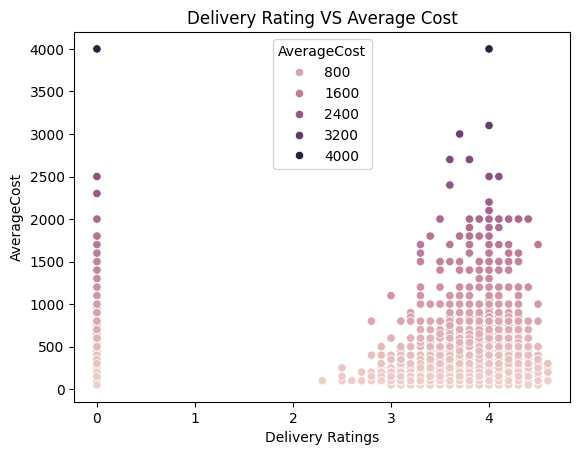

In [ ]:
sns.scatterplot(data=df, x='Delivery Ratings', y='AverageCost', hue='AverageCost')
plt.title("Delivery Rating VS Average Cost")
plt.show()

**From the above graph we conclude that higher the average cost better is the delivery rating in many cases.**

# Answering Few Questions.

### 1. What are the top five restaurants for each category (Dine-In, Delivery, Takeaway, Vegetarian)?

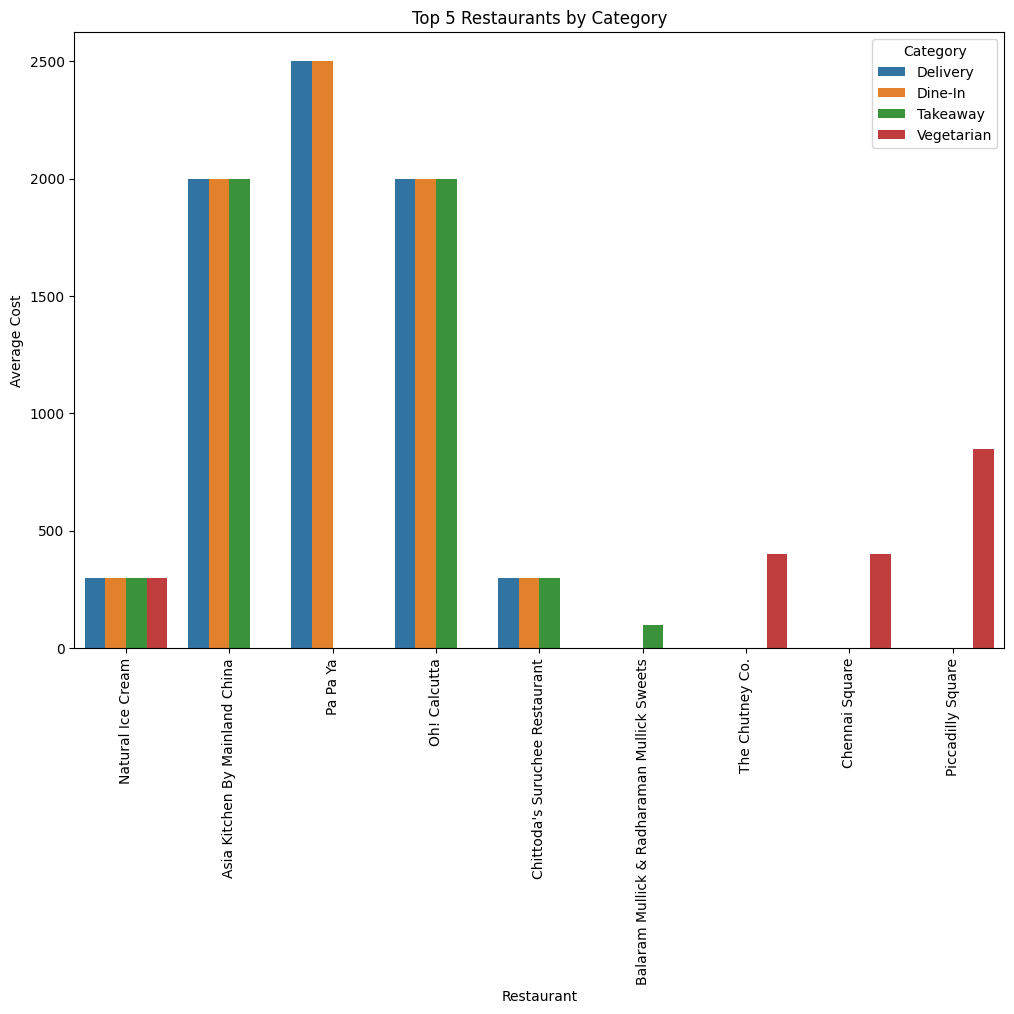

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define the categories and their corresponding filters
categories = {
    'Delivery': (df['IsHomeDelivery'] == 1) & (df['Dinner Ratings'] >= 4.5) & (df['Delivery Ratings'] >= 4),
    'Dine-In': (df['isIndoorSeating'] == 1) & (df['Dinner Ratings'] >= 4.5) & (df['Delivery Ratings'] >= 4),
    'Takeaway': (df['isTakeaway'] == 1) & (df['Dinner Ratings'] >= 4.5) & (df['Delivery Ratings'] >= 4),
    'Vegetarian': (df['isVegOnly'] == 1) & (df['Dinner Ratings'] >= 4.5) & (df['Delivery Ratings'] >= 4)
}

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Name', y='AverageCost', hue='Category', data=pd.concat([
    df.loc[category].sort_values(by=['Dinner Ratings', 'Delivery Ratings'], ascending=False)[:5].assign(Category=cat)
    for cat, category in categories.items()
]))

plt.title('Top 5 Restaurants by Category')
plt.xlabel('Restaurant')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()

### 2. What are the highest rating restaurants for Chinese cuisine?

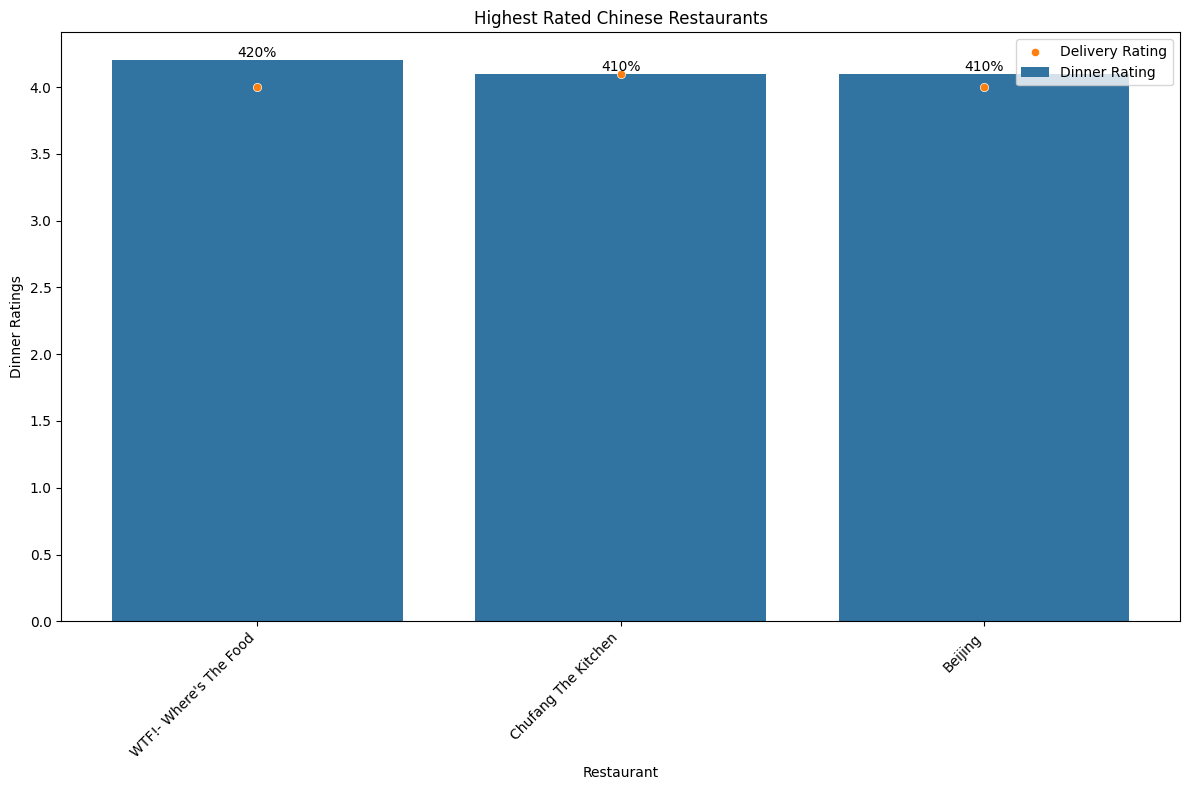

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to get the top 5 highest-rated Chinese restaurants
chinese_restaurants = df.loc[(df['Cuisines'] == 'Chinese') & (df['Dinner Ratings'] >= 4) & (df['Delivery Ratings'] >= 4)]
top_chinese_restaurants = chinese_restaurants.sort_values(by=['Dinner Ratings', 'Delivery Ratings'], ascending=False)[:5]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Name', y='Dinner Ratings', data=top_chinese_restaurants, order=top_chinese_restaurants['Name'], label='Dinner Rating')
sns.scatterplot(x='Name', y='Delivery Ratings', data=top_chinese_restaurants, label='Delivery Rating')

# Add percentage text on top of the bars
for i, v in enumerate(top_chinese_restaurants['Dinner Ratings']):
    ax.text(i, v, f"{v:.0%}", color='black', ha='center', va='bottom', fontsize=10)

plt.title('Highest Rated Chinese Restaurants')
plt.xlabel('Restaurant')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Conclusions

After performing EDA performing different kinds of visualizations on the data we came upon few conclusions. They are:
* The highest number of restaurants are present in New Town, Kolkata.
* Around 60% restaurants provide indoor seatings ,i.e, 40% does not provide indoor seatings. From this graph we can conclude that most of the restaurants provides indoor seatings.
* 99.9% restaurants provide home delivery services.
* 68.6% restaurants has takeaway facilities ,i.e, 31.4% restaurants does not have takeaway facilities.
* 93.1% restaurants didn't have veg only option, i.e, only 6.9% resturants provide veg only options for customers.
* Average cost is higher for restaurants providing home deliveries than those not providing home deliveries.
* Higher the average cost better are the dinner and delivery ratings in many cases.